**Importation des bibliotheques**

In [1]:
#importation des bilbliothèques
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob
from google.colab import drive

In [12]:

# Monter le lecteur Google Drive
drive.mount('/content/drive')

# Spécifions les chemins des répertoires contenant les images
chemin_images_recherche = '/content/drive/MyDrive/VO_M2/image_TP1/Image_chercher/'
chemin_images_objets = '/content/drive/MyDrive/VO_M2/image_TP1/objets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

#Fonction de chargement des dossiers d'images

import os
from PIL import Image

def charger_images_dossier(chemin_dossier):
    images = []
    extensions_image = ['.jpg', '.jpeg', '.png']  # Extensions d'image prises en charge

    # Parcourir tous les fichiers du dossier
    for nom_fichier in os.listdir(chemin_dossier):
        chemin_fichier = os.path.join(chemin_dossier, nom_fichier)

        # Vérifier si le fichier a une extension d'image valide
        if os.path.isfile(chemin_fichier) and any(ext in nom_fichier for ext in extensions_image):
            # Charger l'image à partir du fichier
            image = Image.open(chemin_fichier)
            images.append(image)

    return images


In [20]:
import os
os.makedirs(chemin_images_recherche, exist_ok=True)
os.makedirs(chemin_images_objets, exist_ok=True)

In [21]:

#Appel de le fonction de chargement et affichage du nombre d'elements dans chaque dossier
images_recherche = charger_images_dossier(chemin_images_recherche)

# Chargement des images du dossier d'objets
images_objets = charger_images_dossier(chemin_images_objets)

# Affichage du nombre total d'images dans chaque dossier
print("Nombre total d'images dans le dossier de recherche:", len(images_recherche))
print("Nombre total d'images dans le dossier d'objets:", len(images_objets))

Nombre total d'images dans le dossier de recherche: 0
Nombre total d'images dans le dossier d'objets: 0


In [22]:
# Fonction d'affichage des images

from PIL import Image

def afficher_images(repertoire_images):
    plt.figure(figsize=(10, 10))
    index = 1

    # Parcourir tous les fichiers du répertoire d'images
    for nom_fichier in os.listdir(repertoire_images):
        chemin_fichier = os.path.join(repertoire_images, nom_fichier)

        # Vérifier si le chemin correspond à un fichier image
        if os.path.isfile(chemin_fichier) and nom_fichier.endswith(('.jpg', '.jpeg', '.png')):
            # Charger et afficher l'image
            image = Image.open(chemin_fichier)
            ax = plt.subplot(4, 4, index)
            plt.imshow(image)
            plt.title('Image {}'.format(index))
            plt.axis("off")
            index += 1

            # Sortir de la boucle après avoir affiché 16 images (4x4 sous-tracés)
            if index > 16:
                break

    plt.tight_layout()
    plt.show()

# Afficher toutes les images du répertoire de recherche
print("Images du répertoire de recherche:")
afficher_images(chemin_images_recherche)

# Afficher toutes les images du répertoire d'objets
print("Images du répertoire d'objets:")
afficher_images(chemin_images_objets)

Images du répertoire de recherche:


<Figure size 1000x1000 with 0 Axes>

Images du répertoire d'objets:


<Figure size 1000x1000 with 0 Axes>

In [23]:
# Fonction de conversion d'image en niveaux de gris


def convert_to_gray(image):
    return image.convert('L')

# Fonction d'affichage des images en niveaux de gris
def afficher_images(repertoire_images):
    plt.figure(figsize=(10, 10))
    index = 1

    # Parcourir tous les fichiers du répertoire d'images
    for nom_fichier in os.listdir(repertoire_images):
        chemin_fichier = os.path.join(repertoire_images, nom_fichier)

        # Vérifier si le chemin correspond à un fichier image
        if os.path.isfile(chemin_fichier) and nom_fichier.endswith(('.jpg', '.jpeg', '.png')):
            # Charger l'image
            image = Image.open(chemin_fichier)
            # Convertir l'image en niveaux de gris
            image_gray = convert_to_gray(image)

            ax = plt.subplot(4, 4, index)
            plt.imshow(image_gray, cmap='gray')
            plt.title('Image {}'.format(index))
            plt.axis("off")
            index += 1

            # Sortir de la boucle après avoir affiché 16 images (4x4 sous-tracés)
            if index > 16:
                break

    plt.tight_layout()
    plt.show()



In [24]:


# Afficher toutes les images du répertoire de recherche en niveaux de gris
print("Images du répertoire de recherche:")
afficher_images(chemin_images_recherche)
# Afficher toutes les images du répertoire d'objets en niveaux de gris
print("Images du répertoire d'objets:")
afficher_images(chemin_images_objets)

Images du répertoire de recherche:


<Figure size 1000x1000 with 0 Axes>

Images du répertoire d'objets:


<Figure size 1000x1000 with 0 Axes>

**Calcul des descripteurs**

In [29]:


from tqdm import tqdm                  #pour la barre de progression du calcul

# Fonction de calcul des descripteurs SIFT
def calcul_descripteurs(images_gray):
    sift = cv2.SIFT_create()
    descriptors = {}
    keypoints = {}
    draws = {}

    with tqdm(total=len(images_gray), desc="Calcul des descripteurs", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
        for key in images_gray:
            current_kp, current_des = sift.detectAndCompute(images_gray[key], None)
            descriptors[key] = current_des
            draws[key] = cv2.drawKeypoints(images_gray[key], current_kp, images_gray[key].copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            keypoints[key] = current_kp
            pbar.update(1)

    return descriptors, keypoints, draws



In [30]:


# Chargement des images en niveaux de gris à partir des répertoires
images_gray_recherche = {}
images_gray_objets = {}

# Parcourir le répertoire de recherche
for nom_fichier in os.listdir(chemin_images_recherche):
    chemin_fichier = os.path.join(chemin_images_recherche, nom_fichier)
    if os.path.isfile(chemin_fichier) and nom_fichier.endswith(('.jpg', '.jpeg', '.png')):
        image_gray = cv2.imread(chemin_fichier, cv2.IMREAD_GRAYSCALE)
        images_gray_recherche[nom_fichier] = image_gray

# Parcourir le répertoire d'objets
for nom_fichier in os.listdir(chemin_images_objets):
    chemin_fichier = os.path.join(chemin_images_objets, nom_fichier)
    if os.path.isfile(chemin_fichier) and nom_fichier.endswith(('.jpg', '.jpeg', '.png')):
        image_gray = cv2.imread(chemin_fichier, cv2.IMREAD_GRAYSCALE)
        images_gray_objets[nom_fichier] = image_gray


In [31]:

#appel de la fonction calcul de descripteur

#print("Calcul des descripteurs pour les images Recherche")
descripteurs_recherche, keypoints_recherche, draws_recherche = calcul_descripteurs(images_gray_recherche)

#print("Calcul des descripteurs pour les images Objets")
descripteurs_objets, keypoints_objets, draws_objets = calcul_descripteurs(images_gray_objets)


Calcul des descripteurs: |           [ time left: ? ]
Calcul des descripteurs: |           [ time left: ? ]


**Affichage dimages avec points d'interets**

In [32]:

def afficher_images_avec_points(images_gray, keypoints, draws):
    for nom_fichier in images_gray:
        image = images_gray[nom_fichier]
        draw = draws[nom_fichier]
        kp = keypoints[nom_fichier]

        # Afficher l'image avec les points d'intérêt encadrés
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
        plt.imshow(draw, alpha=0.8)
        plt.title(nom_fichier)
        plt.axis('off')
        plt.show()

# Appel de la fonction d'affichage pour les images de recherche
afficher_images_avec_points(images_gray_recherche, keypoints_recherche, draws_recherche)

# Appel de la fonction d'affichage pour les images d'objets
afficher_images_avec_points(images_gray_objets, keypoints_objets, draws_objets)

#Il est important de noter que la taille des rayons des cercles n'indique pas nécessairement la pertinence ou l'importance des points d'intérêt. Les points d'intérêt avec de grands rayons ne sont pas nécessairement plus importants que ceux avec de petits rayons.
#L'importance réelle des points d'intérêt dépend de leur capacité à être robustes, distinctifs et reproductibles dans différentes conditions d'image.

In [47]:

# Affichage des descripteurs de chaque image de recherche
for nom_image, descripteurs_image in descripteurs_recherche.items():
    print(f"Descripteurs de l'image de recherche '{nom_image}':")
    print(descripteurs_image)
    print()

# Affichage des descripteurs de chaque image d'objets
for nom_image, descripteurs_image in descripteurs_objets.items():
    print(f"Descripteurs de l'image d'objet '{nom_image}':")
    print(descripteurs_image)
    print()

**Fonction principale pour les correspondances**

In [34]:

#Cette fn effectue la correspondance entre les descripteurs d'images de recherche et les descripteurs d'objets en utilisant le critère du ratio pour filtrer les corresp.
def my_match(image_recherche, image_objet, seuil_ratio=0.8 , seuil_score=0.5):
    is_finded=0
    descripteur_recherche=descripteurs_recherche[image_recherche]
    descripteur_objet=descripteurs_objets[image_objet]
    #bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descripteur_objet, descripteur_recherche, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < seuil_ratio * n.distance:
            good_matches.append([m])
    todisplay = cv2.drawMatchesKnn(cv2.imread(chemin_images_objets+ image_objet),keypoints_objets[image_objet],cv2.imread(chemin_images_recherche + image_recherche),keypoints_recherche[image_recherche],good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    #calcul du score de similiarité
    score_similarite=(len(good_matches)/len(descripteur_objet))*100

    #todisplay = cv2.drawMatchesKnn(cv2.imread(image_objet),keypoints_objets[image_objet],cv2.imread(image_objet),keypoints_recherche[image_recherche],good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    if seuil_score<score_similarite:
      is_finded=1

    return is_finded,score_similarite,todisplay


In [44]:
#Cette fn effectue la correspondance entre les descripteurs d'images de recherche et les descripteurs d'objets en utilisant le critère du ratio pour filtrer les corresp.
def my_match(image_recherche, image_objet, seuil_ratio=0.8 , seuil_score=0.5):
    is_finded=0
    # Correction : Accéder aux descripteurs en utilisant les noms de fichiers corrects
    descripteur_recherche=descripteurs_recherche[image_recherche]
    descripteur_objet=descripteurs_objets[image_objet]
    #bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descripteur_objet, descripteur_recherche, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < seuil_ratio * n.distance:
            good_matches.append([m])
    todisplay = cv2.drawMatchesKnn(cv2.imread(chemin_images_objets+ image_objet),keypoints_objets[image_objet],cv2.imread(chemin_images_recherche + image_recherche),keypoints_recherche[image_recherche],good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    #calcul du score de similiarité
    score_similarite=(len(good_matches)/len(descripteur_objet))*100



In [45]:
#Cette fn effectue la correspondance entre les descripteurs d'images de recherche et les descripteurs d'objets en utilisant le critère du ratio pour filtrer les corresp.
def my_match(image_recherche, image_objet, seuil_ratio=0.8 , seuil_score=0.5):
    is_finded=0
    # Correction : Accéder aux descripteurs en utilisant les noms de fichiers corrects
    # Vérification si la clé existe avant d'accéder au descripteur
    if image_recherche in descripteurs_recherche:
        descripteur_recherche=descripteurs_recherche[image_recherche]
    else:
        print(f"Erreur : Image de recherche '{image_recherche}' non trouvée dans les descripteurs.")
        return 0, 0, None  # Ou lever une exception plus appropriée

    if image_objet in descripteurs_objets:
        descripteur_objet=descripteurs_objets[image_objet]
    else:
        print(f"Erreur : Image d'objet '{image_objet}' non trouvée dans les descripteurs.")
        return 0, 0, None  # Ou lever une exception plus appropriée
    #bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descripteur_objet, descripteur_recherche, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < seuil_ratio * n.distance:
            good_matches.append([m])
    todisplay = cv2.drawMatchesKnn(cv2.imread(chemin_images_objets+ image_objet),keypoints_objets[image_objet],cv2.imread(chemin_images_recherche + image_recherche),keypoints_recherche[image_recherche],good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    #calcul du score de similiarité
    score_similarite=(len(good_matches)/len(descripteur_objet))*100

    if seuil_score<score_similarite:
      is_finded=1

    return is_finded,score_similarite,todisplay

Erreur : Image de recherche 'image_chercher5.jpg' non trouvée dans les descripteurs.
object non trouvé pour le seuil de score 0.8 === score_simalirite trouve 0


TypeError: Image data of dtype object cannot be converted to float

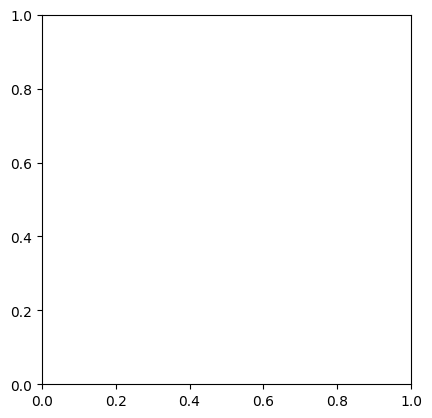

In [46]:
#appel de la fn principale sur les images test
seuil_score=0.8
seuil_ratio=0.75 # recommandé pour SIFT et selon nos observations

# Assurez-vous que les images que vous testez existent dans les dictionnaires
# descripteurs_recherche et descripteurs_objets.
image_recherche = 'image_chercher5.jpg'  # Remplacez par le nom de votre image de recherche
image_objet = 'object5.jpg'  # Remplacez par le nom de votre image d'objet

is_finded,score_similarite,image_resultat=my_match(image_recherche, image_objet, seuil_ratio,seuil_score )
if is_finded==0:
  print(f"object non trouvé pour le seuil de score {seuil_score} === score_simalirite trouve {score_similarite}")

  # Affichez l'image avec plt.imshow
  plt.imshow(image_resultat)
  plt.show()  # Appelez plt.show() pour afficher l'image

else:
  print(f"objet trouvé === score_simalirite trouve: {score_similarite} ")

  # Affichez l'image avec plt.imshow
  plt.imshow(image_resultat)
  plt.show()  # Appelez plt.show() pour afficher l'image

In [37]:
#appel de la fn principale sur les images test
seuil_score=0.8
seuil_ratio=0.75 # recommandé pour SIFT et selon nos observations
is_finded,score_similarite,image_resultat=my_match('object5.jpg','image_chercher5.jpg', seuil_ratio,seuil_score )
if is_finded==0:
  print(f"object non trouvé pour le seuil de score {seuil_score} === score_simalirite trouve {score_similarite}")
  plt.imshow(image_resultat),plt.show()
else:
  print(f"objet trouvé === score_simalirite trouve: {score_similarite} ")
  plt.imshow(image_resultat),plt.show()
  image_recherche = 'image_chercher2.jpg'
image_objet = 'object2.jpg'


KeyError: 'object5.jpg'